In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data

In [34]:
# housing districts
housing = pd.read_csv('housing.csv')

#### Inspect data

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [38]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


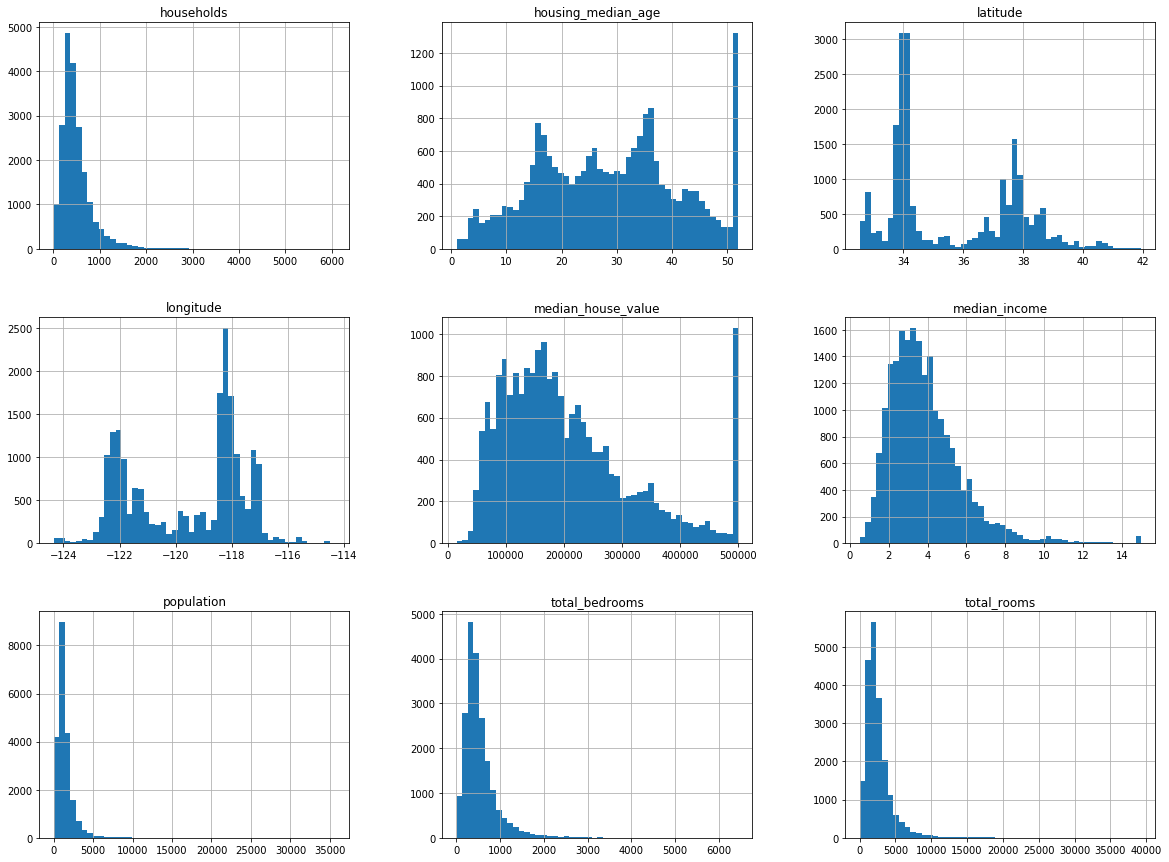

In [39]:
# show histogram
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### Create a Test Set

Stratified sampling with income category

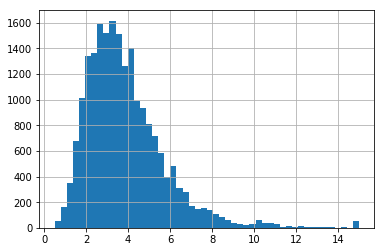

In [40]:
housing['median_income'].hist(bins=50)

Create temporary attribute to perform train & test split

In [41]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

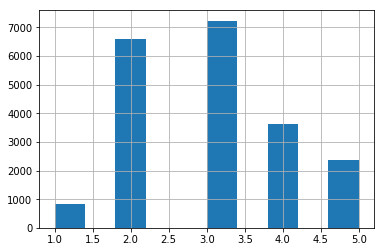

In [42]:
housing['income_cat'].hist()

In [43]:
# random sampling
from sklearn.model_selection import train_test_split

random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [44]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [45]:
# sampling bias comparison
overall = housing['income_cat'].value_counts() / len(housing)
random = random_test_set['income_cat'].value_counts() / len(random_test_set)
stratified = strat_test_set['income_cat'].value_counts() / len(strat_test_set)
error_rand = abs(overall - random)
error_strat = abs(overall - stratified)
comparison = pd.concat([overall, random, stratified, error_rand, error_strat], axis=1)
comparison.columns = ['Overall', 'Random', 'Stratified', '% Err Rand', '% Err Strat']
comparison.sort_index()

,Overall,Random,Stratified,% Err Rand,% Err Strat
1.0,0.039826,0.040213,0.039729,0.000388,0.000097
2.0,0.318847,0.324370,0.318798,0.005523,0.000048
3.0,0.350581,0.358527,0.350533,0.007946,0.000048
4.0,0.176308,0.167393,0.176357,0.008915,0.000048
5.0,0.114438,0.109496,0.114583,0.004942,0.000145


Smaller error margin from stratified sampling

In [46]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

#### Visualize Data

Using alpha to spot the higher-density areas

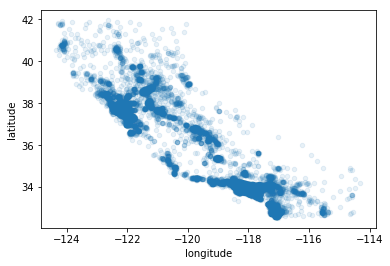

In [47]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

heatmap with legend for median house value

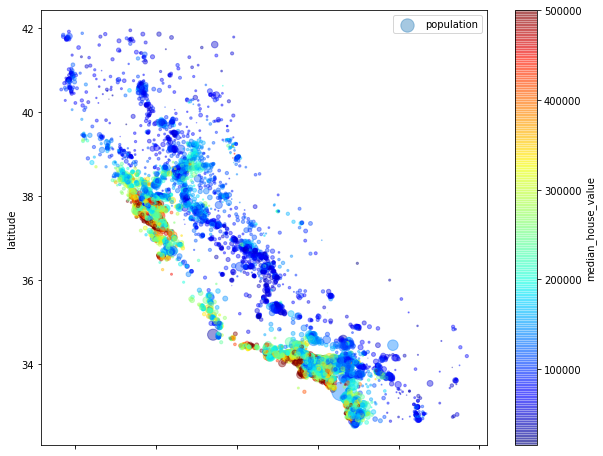

In [48]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True, figsize=(10,8))
plt.legend()

from the image we get that house prices are related to location (e.g. close to the ocean) and density of population

#### Looking for Correlations

In [49]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e51940>,
      dtype=object)

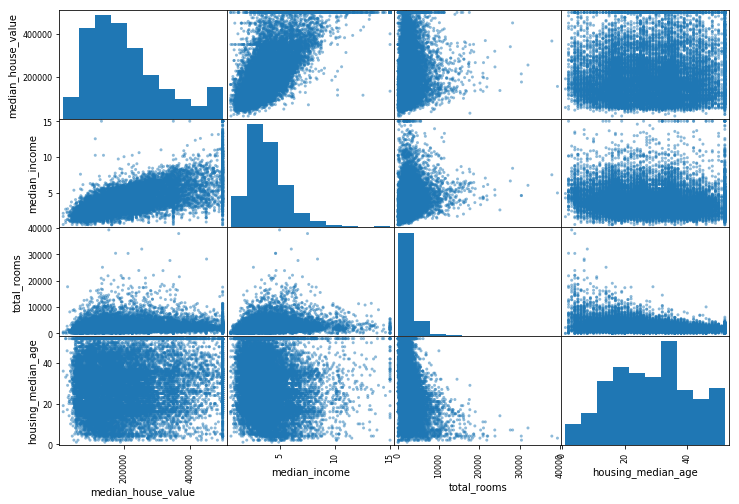

In [50]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

the most promising attribute to predict the median house value is the median income so let's zoom in

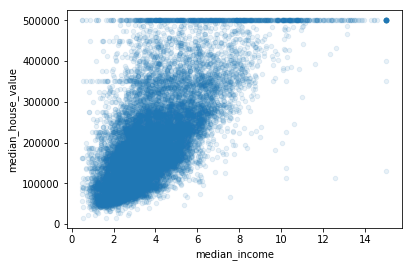

In [51]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

#### Attribute Combinations

In [52]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

After adding some meaningful combined attributes let's check the correlation coefficient

In [53]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Data Preparation for ML Algorithms

In [54]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Data Cleaning

In order to deal with missing values

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [56]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [57]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [58]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [59]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

we can use the trained imputer to fill missing values in the data

In [60]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

#### Handling Text and Categorical Attributes

In [61]:
housing_cat = housing[['ocean_proximity']]

In [64]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [100]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


LabelEncoder is a scikit-learn transformer. However there's the issue that it assumes that the proximity of indexes reflects similarity, which is not the case for this attribute. So let's try a different approach.

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_onehot = encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Both transformations can be applied together using LaberBinarizer (doesn't work with sklearn >=0.19)

In [67]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True)
housing_cat_onehot = encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Custom Transformers

Example of custom transformer to add combined attributes to dataset

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [69]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attrs = attr_adder.transform(housing.values)
housing_extra_attrs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

Example of custom transformer to handle Pandas DataFrames

In [70]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#### Feature Scaling
can be achieved by means of normalisation or standardisation

**Normalisation** returns values in a scale from 0 to 1 traditionally which is what some algorithms expect (e.g. neural networks) but **Standardisation** is much less affected by outliers.

#### Transformation Pipelines

In [71]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('label_encoder', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [72]:
housing_prepared = full_pipeline.fit_transform(housing)

In [73]:
housing_prepared.shape

(16512, 16)

#### Select and Train a Model

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's try it on some instances of the training set

In [75]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print('Predictions:\n', lin_reg.predict(some_data_prepared))
print('Labels:\n', list(some_labels))

Predictions:
 [210644.60465149 317768.80712797 210956.43324364  59218.98859499
 189747.55851326]
Labels:
 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Not very accurate. Let's see the RMSE for the regression model

In [76]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
lin_rmse

68628.19819848923

**Underfit**. Let's try a different model

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_rmse

0.0

**Overfit**. Let's confirm by using cross-validation

#### Using Cross-Validation

In [79]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [80]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [70347.30002883 66757.91722721 71907.38167158 68332.0369399
 72889.60079781 74784.57772061 70537.61705577 71062.40971615
 76883.8035433  70432.42552288]
Mean: 71393.50702240353
Standard deviation: 2790.4618203112364


Let's try cross-validation with the linear regression model

In [81]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [66782.73844188 66960.11808125 70347.95242152 74739.57053058
 68031.13388523 71193.84183373 64969.6305678  68281.61137975
 71552.91568634 67665.1008085 ]
Mean: 69052.46136365714
Standard deviation: 2731.674002905058


Let's try a random forest model

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_rmse

22595.42828904398

In [86]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [53405.46022543 49228.56143673 51569.83422216 54451.57510664
 51863.56394357 55511.64444802 50861.47121797 51113.59981814
 55464.89384747 52685.01613657]
Mean: 52615.56204026935
Standard deviation: 1974.062766967907


#### Fine-Tune Model

##### Grid Search

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Best parameters

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Best estimator

In [90]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

Evaluation scores list

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63461.99689743144 {'max_features': 2, 'n_estimators': 3}
55688.45652296484 {'max_features': 2, 'n_estimators': 10}
52846.41765718067 {'max_features': 2, 'n_estimators': 30}
60440.05971971623 {'max_features': 4, 'n_estimators': 3}
52920.83067108376 {'max_features': 4, 'n_estimators': 10}
50167.733846681156 {'max_features': 4, 'n_estimators': 30}
59883.425121478445 {'max_features': 6, 'n_estimators': 3}
51961.343091301496 {'max_features': 6, 'n_estimators': 10}
50142.45548100641 {'max_features': 6, 'n_estimators': 30}
59431.90265138283 {'max_features': 8, 'n_estimators': 3}
52511.01703354752 {'max_features': 8, 'n_estimators': 10}
49959.11762195093 {'max_features': 8, 'n_estimators': 30}
61408.14615999678 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54888.4200247653 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60414.726410067495 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52815.98568140324 {'bootstrap': False, 'max_features': 3, 'n_estimators':

Grid search works fine when exploring fewer combinations. But when the hyperparameters search space is large, it's better to use randomised search (Scikit's RandomizedSearchCV)

##### Analyse the Best Models and Their Errors

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.95510185e-02, 6.04248058e-02, 4.35182714e-02, 1.68005578e-02,
       1.41426360e-02, 1.56753448e-02, 1.37877999e-02, 3.23730431e-01,
       5.14697845e-02, 1.14307930e-01, 9.06704911e-02, 4.07530542e-03,
       1.76800371e-01, 1.40120480e-04, 1.72294151e-03, 3.18219096e-03])

In [99]:
extra_attrs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attrs = list(encoder.classes_)
attributes = num_attrs + extra_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32373043135997415, 'median_income'),
 (0.17680037089383405, 'INLAND'),
 (0.1143079295291602, 'population_per_household'),
 (0.09067049112663678, 'bedrooms_per_room'),
 (0.06955101853754284, 'longitude'),
 (0.06042480577324967, 'latitude'),
 (0.051469784505077776, 'rooms_per_household'),
 (0.0435182714048702, 'housing_median_age'),
 (0.01680055782170211, 'total_rooms'),
 (0.01567534483079303, 'population'),
 (0.014142635953684094, 'total_bedrooms'),
 (0.013787799897660732, 'households'),
 (0.00407530541593902, '<1H OCEAN'),
 (0.00318219096396257, 'NEAR OCEAN'),
 (0.0017229415062762763, 'NEAR BAY'),
 (0.00014012047963644984, 'ISLAND')]

#### Evaluate System on Test Set

In [104]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47979.00923060145

:)